# Setup

### Load contents of setup.py
Import modules, prepare signals

In [ ]:
%load setup.py

# Scale optimisation

#### `ipm.scale(arr_in: np.array, scale_factor_x=1.0, scale_factor_y=1.0)`

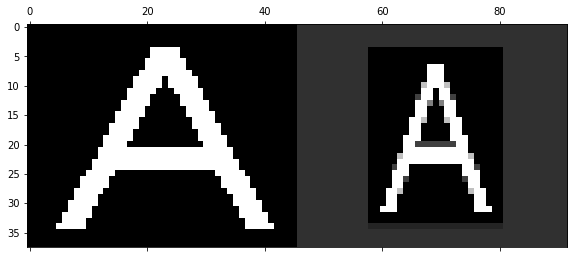

In [30]:
scale_x = 0.5
scale_y = 0.8
arr_A_scaled = ipm.scale(arr_A, scale_x, scale_y)
plt.matshow(np.hstack((arr_A, arr_A_scaled)))

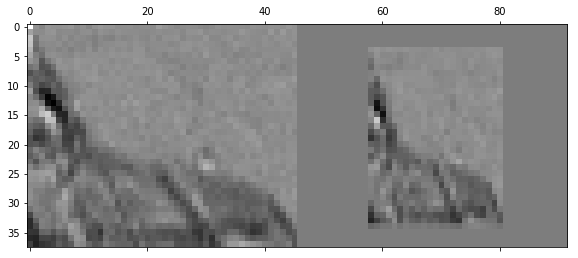

In [31]:
data_1_0_scaled = ipm.scale(signal_1.data[0], scale_x, scale_y)
plt.matshow(np.hstack((signal_1.data[0], data_1_0_scaled)))

#### `ipm.optimise_scale(arr_moving: np.array, arr_ref: np.array, initial_guess_x=1.0, initial_guess_y=1.0)`

Uses the Powell local optimisation algorithm to obtain scale factors in the x- and y-directions that maximise the mutual information between `arr_scaled` and `arr_ref`, where `arr_scaled` is the scaled version of `arr_moving`.

In [32]:
scale_optimisation_result = ipm.optimise_scale(arr_A, arr_A_scaled)

In [33]:
scale_optimisation_result

array([0.497253  , 0.79883636])

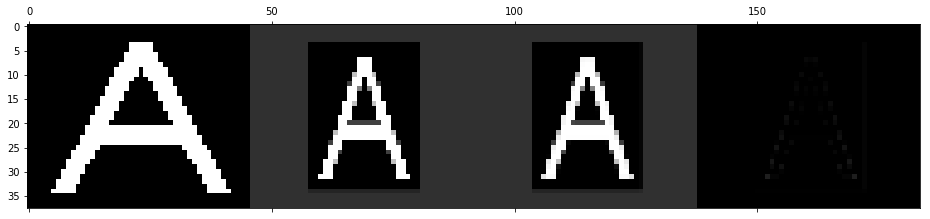

In [8]:
scale_x_estimated = scale_optimisation_result[0]
scale_y_estimated = scale_optimisation_result[1]
arr_A_scaled_2 = ipm.scale(arr_A, scale_x_estimated, scale_y_estimated)
plt.matshow(np.hstack((arr_A, arr_A_scaled, arr_A_scaled_2, abs(arr_A_scaled - arr_A_scaled_2))))

Left to right: `arr_A` unmodified; `arr_A_scaled`, which is `arr_A` scaled by 0.5 horizontally and 0.8 vertically; `arr_A_scaled_2`, which is `arr_A` transformed by the scale factors estimated by `ipm.optimise_scale`; the absolute difference between `arr_A_scaled` and `arr_A_scaled_2`.

# Rotation optimisation

#### `ipm.rotate(arr_in: np.array, rotate_radians=0.0)`

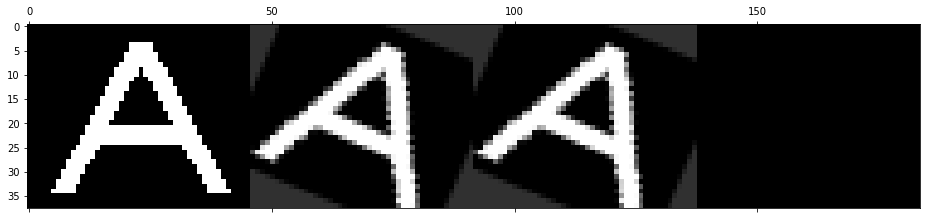

In [2]:
rotation = math.pi/8
arr_A_rotated = ipm.rotate(arr_A, rotation)
arr_A_rotated_v2 = ipm.transform_using_values(arr_A, [1.0, 1.0, 0.0, rotation, 0.0, 0.0])
plt.matshow(np.hstack((arr_A, arr_A_rotated, arr_A_rotated_v2, abs(arr_A_rotated - arr_A_rotated_v2))))

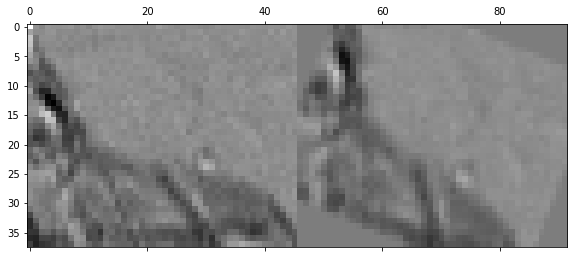

In [3]:
data_1_0_rotated = ipm.rotate(signal_1.data[0], rotation)
plt.matshow(np.hstack((signal_1.data[0], data_1_0_rotated)))

#### `ipm.optimise_rotation(arr_moving: np.array, arr_ref: np.array, initial_guess_radians=0.1)`

Uses the Powell local optimisation algorithm to obtain a rotation angle (in radians) that maximises the mutual information between `arr_rotated` and `arr_ref`, where `arr_rotated` is the rotated version of `arr_moving`.

`ipm.optimise_rotation` seems to get stuck on 0.0 radians if `initial_guess_radians` is 0.0, possibly because the magnitude of the initial guess determines the magnitude of the search space.

In [4]:
rotation_optimisation_result_A_v1 = ipm.optimise_rotation(arr_A, arr_A_rotated)
rotation_optimisation_result_A_v1

array(0.39276278)

In [5]:
rotation_optimisation_result_A_v2 = ipm.optimise_rotation_best_of_two(arr_A, arr_A_rotated)
rotation_optimisation_result_A_v2

array(0.39273184)

In [6]:
#rotation_optimisation_result_A_v3 = ipm.optimise_affine(arr_A, arr_A_rotated, bounds=[(1, 1), (1, 1), (0, 0), (-math.pi/3, math.pi/3), (0, 0), (0, 0)])
rotation_optimisation_result_A_v3 = ipm.optimise_affine(arr_A, arr_A_rotated, lock_scale=True, lock_shear=True, lock_translation=True)

In [8]:
rotation_optimisation_result_A_v3

array([1.        , 1.        , 0.        , 0.39298861, 0.        ,
       0.        ])

In [9]:
rotation

0.39269908169872414

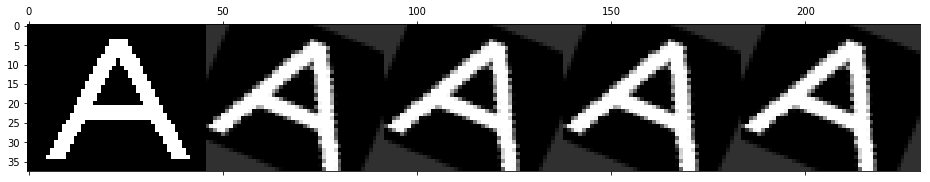

In [10]:
arr_A_rotated_2_v1 = ipm.rotate(arr_A, float(rotation_optimisation_result_A_v1))
arr_A_rotated_2_v2 = ipm.rotate(arr_A, float(rotation_optimisation_result_A_v2))
arr_A_rotated_2_v3 = ipm.transform_using_values(arr_A, rotation_optimisation_result_A_v3)
plt.matshow(np.hstack((arr_A, arr_A_rotated, arr_A_rotated_2_v1, arr_A_rotated_2_v2, arr_A_rotated_2_v3)))

In [11]:
rotation_optimisation_result_1_v1 = ipm.optimise_rotation(signal_1.data[0], data_1_0_rotated)
rotation_optimisation_result_1_v1

array(0.39275291)

In [12]:
rotation_optimisation_result_1_v2 = ipm.optimise_rotation_best_of_two(signal_1.data[0], data_1_0_rotated)
rotation_optimisation_result_1_v2

array(0.39289055)

In [13]:
#rotation_optimisation_result_1_v3 = ipm.optimise_affine(signal_1.data[0], data_1_0_rotated, bounds=[(1, 1), (1, 1), (0, 0), (-math.pi/3, math.pi/3), (0, 0), (0, 0)])
rotation_optimisation_result_1_v3 = ipm.optimise_affine(signal_1.data[0], data_1_0_rotated, lock_scale=True, lock_shear=True, lock_translation=True)

In [14]:
rotation_optimisation_result_1_v3

array([1.        , 1.        , 0.        , 0.39262986, 0.        ,
       0.        ])

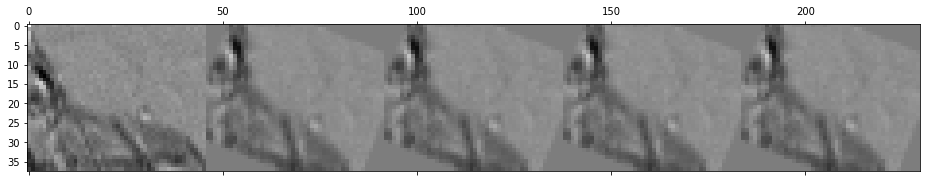

In [15]:
data_1_0_rotated_2_v1 = ipm.rotate(signal_1.data[0], float(rotation_optimisation_result_1_v1))
data_1_0_rotated_2_v2 = ipm.rotate(signal_1.data[0], float(rotation_optimisation_result_1_v2))
data_1_0_rotated_2_v3 = ipm.transform_using_values(signal_1.data[0], rotation_optimisation_result_1_v3)
plt.matshow(np.hstack((signal_1.data[0], data_1_0_rotated, data_1_0_rotated_2_v1, data_1_0_rotated_2_v2, data_1_0_rotated_2_v3)))

# Affine registration via local optimisation method (`arr_A`, no shear)

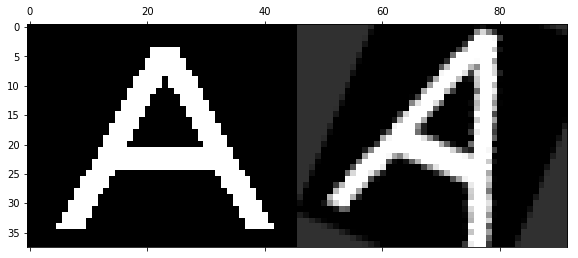

In [2]:
test_scale_x = 0.8
test_scale_y = 1.2
test_rotation = math.pi/8
test_offset_x = 2
test_offset_y = -0.8
arr_A_transformed = ipm.transform_using_values(arr_A, [
    test_scale_x, test_scale_y, 0, test_rotation, test_offset_x, test_offset_y])
plt.matshow(np.hstack((arr_A, arr_A_transformed)))

In [3]:
method='Powell'
affine_optimisation_result = ipm.optimise_affine_no_shear(arr_A, arr_A_transformed, method=method)

In [4]:
affine_optimisation_result

array([ 0.79748731,  1.19827772,  0.39122544,  1.99342778, -0.80199285])

In [5]:
params = [affine_optimisation_result[0], affine_optimisation_result[1], 0, affine_optimisation_result[2], affine_optimisation_result[3], affine_optimisation_result[4]]

In [6]:
affine_optimisation_result_2 = ipm.optimise_affine_no_shear(
    arr_A, arr_A_transformed, 
    scale_x=1.0, scale_y=1.0, 
    rotate_radians=0.2, 
    offset_x=0.0, offset_y=0.0, 
    method=method)

In [7]:
affine_optimisation_result_2

array([ 0.79982042,  1.19937733,  0.39276952,  1.99981954, -0.80016811])

In [8]:
params_2 = [affine_optimisation_result_2[0], affine_optimisation_result_2[1], 0, affine_optimisation_result_2[2], affine_optimisation_result_2[3], affine_optimisation_result_2[4]]

In [10]:
affine_optimisation_result_3 = ipm.optimise_affine(arr_A, arr_A_transformed, method=method, lock_shear=True)

In [11]:
affine_optimisation_result_3

array([ 0.79962858,  1.19883352,  0.        ,  0.39326379,  2.00668246,
       -0.79682081])

In [12]:
[test_scale_x, test_scale_y, 0, test_rotation, test_offset_x, test_offset_y]

[0.8, 1.2, 0, 0.39269908169872414, 2, -0.8]

In [13]:
params_3 = affine_optimisation_result_3

In [14]:
arr_A_transformed_estimated = ipm.transform_using_values(arr_A, params)

In [15]:
arr_A_transformed_estimated_2 = ipm.transform_using_values(arr_A, params_2)

In [16]:
arr_A_transformed_estimated_3 = ipm.transform_using_values(arr_A, params_3)

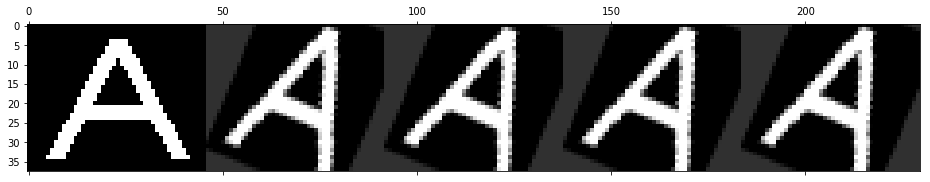

In [17]:
plt.matshow(np.hstack((arr_A, arr_A_transformed, arr_A_transformed_estimated, arr_A_transformed_estimated_2, arr_A_transformed_estimated_3)))

Left to right: `arr_A` unmodified; `arr_A_transformed`, which is `arr_A` scaled to be taller and narrower, slightly shifted, and rotated clockwise by pi/8 radians (i.e. 22.5 degrees); `arr_A_transformed_estimated`, which is `arr_A` transformed by the parameters estimated by `ipm.optimise_affine_no_shear`; `arr_A_transformed_estimated_2`, which is `arr_A` transformed by the same method with a different initial guess of the rotation parameter; `arr_A_transformed_estimated_3`, which is `arr_A` transformed by the parameters estimated by `ipm.optimise_affine` with `lock_shear=True`.

# Affine registration via local optimisation method (`signal_2`, no shear)

In [2]:
# Takes about 95 seconds to run
signal_2_affine_params = ipm.affine_signal_params(signal_2, registration_method=ipm.optimise_affine, reg_kwargs={'lock_shear': True})

Estimating affine parameters for frame 1 of 151
Estimating affine parameters for frame 2 of 151
Estimating affine parameters for frame 3 of 151
Estimating affine parameters for frame 4 of 151
Estimating affine parameters for frame 5 of 151
Estimating affine parameters for frame 6 of 151
Estimating affine parameters for frame 7 of 151
Estimating affine parameters for frame 8 of 151
Estimating affine parameters for frame 9 of 151
Estimating affine parameters for frame 10 of 151
Estimating affine parameters for frame 11 of 151
Estimating affine parameters for frame 12 of 151
Estimating affine parameters for frame 13 of 151
Estimating affine parameters for frame 14 of 151
Estimating affine parameters for frame 15 of 151
Estimating affine parameters for frame 16 of 151
Estimating affine parameters for frame 17 of 151
Estimating affine parameters for frame 18 of 151
Estimating affine parameters for frame 19 of 151
Estimating affine parameters for frame 20 of 151
Estimating affine parameters 

In [3]:
# Show minimum and maximum estimated values for each parameter
for params in signal_2_affine_params.T:
    print((params.min(), params.max()))

(0.9486628712874257, 1.2326654489137683)
(0.8479250366483415, 1.1379282440976757)
(0.0, 0.0)
(-0.04534700384884715, 0.07086949523460953)
(-0.8507255716574695, 0.8298367397969338)
(-0.39670090048146384, 0.6164858620069572)


In [4]:
signal_2_transformed = ipm.apply_affine_params_to_signal(signal_2, signal_2_affine_params)

In [5]:
reference_image_index = ipm.highest_mutual_information_index(signal_2)
reference_image_normalised = ipm.normalised_image(signal_2.data[reference_image_index])
signal_ref_diff_original = hs.signals.Signal2D(np.empty_like(signal_2))
signal_ref_diff_registered = hs.signals.Signal2D(np.empty_like(signal_2))
num_images = signal_2.data.shape[0]
for t in range(num_images):
    signal_ref_diff_original.data[t] = abs(ipm.normalised_image(signal_2.data[t]) - reference_image_normalised)
    signal_ref_diff_registered.data[t] = abs(ipm.normalised_image(signal_2_transformed.data[t]) - reference_image_normalised)
signal_error_diff = hs.signals.Signal2D(signal_ref_diff_registered.data - signal_ref_diff_original.data)

In [6]:
%matplotlib qt
hs.plot.plot_signals([signal_2, signal_2_transformed, signal_error_diff])

# Affine registration via local optimisation method (`signal_4`, isotropic scaling, no shear)

#### Estimate scale, rotation, x-translation and y-translation all at once

In [6]:
# Takes about 5 minutes to run
signal_4_affine_params = ipm.affine_signal_params(signal_4, registration_method=ipm.optimise_affine, reg_kwargs={'isotropic_scaling': True, 'lock_shear': True})

Estimating affine parameters for frame 1 of 20
Estimating affine parameters for frame 2 of 20
Estimating affine parameters for frame 3 of 20
Estimating affine parameters for frame 4 of 20
Estimating affine parameters for frame 5 of 20
Estimating affine parameters for frame 6 of 20
Estimating affine parameters for frame 7 of 20
Estimating affine parameters for frame 8 of 20
Estimating affine parameters for frame 9 of 20
Estimating affine parameters for frame 10 of 20
Estimating affine parameters for frame 11 of 20
Estimating affine parameters for frame 12 of 20
Estimating affine parameters for frame 13 of 20
Estimating affine parameters for frame 14 of 20
Estimating affine parameters for frame 15 of 20
Estimating affine parameters for frame 16 of 20
Estimating affine parameters for frame 17 of 20
Estimating affine parameters for frame 18 of 20
Estimating affine parameters for frame 19 of 20
Estimating affine parameters for frame 20 of 20


In [7]:
# Show minimum and maximum estimated values for each parameter
for params in signal_4_affine_params.T:
    print((params.min(), params.max()))

(0.9820399227005756, 1.0610670534480404)
(0.9820399227005756, 1.0610670534480404)
(0.0, 0.0)
(-0.11138616181147443, 0.18936488787202171)
(-2.0151034255610387, 37.05811759683736)
(-3.5891375468008953, 12.391297610366362)


In [10]:
signal_4_transformed = ipm.apply_affine_params_to_signal(signal_4, signal_4_affine_params)

#### First estimate x-translation and y-translation only, then estimate scale and rotation only

In [11]:
shifts_4 = signal_4.estimate_shift2D(reference='current', sobel=True, medfilter=True, hanning=True, sub_pixel_factor=50)
signal_4_shifted = ipm.correct_shifts_vh(signal_4, shifts_4)

In [12]:
# Takes about 2 minutes to run
signal_4_other_params = ipm.affine_signal_params(signal_4_shifted, registration_method=ipm.optimise_affine, reg_kwargs={'isotropic_scaling': True, 'lock_shear': True, 'lock_translation': True})

Estimating affine parameters for frame 1 of 20
Estimating affine parameters for frame 2 of 20
Estimating affine parameters for frame 3 of 20
Estimating affine parameters for frame 4 of 20
Estimating affine parameters for frame 5 of 20
Estimating affine parameters for frame 6 of 20
Estimating affine parameters for frame 7 of 20
Estimating affine parameters for frame 8 of 20
Estimating affine parameters for frame 9 of 20
Estimating affine parameters for frame 10 of 20
Estimating affine parameters for frame 11 of 20
Estimating affine parameters for frame 12 of 20
Estimating affine parameters for frame 13 of 20
Estimating affine parameters for frame 14 of 20
Estimating affine parameters for frame 15 of 20
Estimating affine parameters for frame 16 of 20
Estimating affine parameters for frame 17 of 20
Estimating affine parameters for frame 18 of 20
Estimating affine parameters for frame 19 of 20
Estimating affine parameters for frame 20 of 20


In [13]:
signal_4_shifted_transformed = ipm.apply_affine_params_to_signal(signal_4_shifted, signal_4_other_params)

In [14]:
# Show minimum and maximum estimated values for each parameter
for params in signal_4_other_params.T:
    print((params.min(), params.max()))

(0.9946878237255475, 1.0187167758282498)
(0.9946878237255475, 1.0187167758282498)
(0.0, 0.0)
(-0.010021422202670388, 0.009339666624482247)
(0.0, 0.0)
(0.0, 0.0)


#### Compare results

In [15]:
reference_image_index = ipm.highest_mutual_information_index(signal_4_shifted)
reference_image_normalised = ipm.normalised_image(signal_4_shifted.data[reference_image_index])
signal_ref_diff_original = hs.signals.Signal2D(np.empty_like(signal_4, dtype=float))
signal_ref_diff_shifted = hs.signals.Signal2D(np.empty_like(signal_4, dtype=float))
signal_ref_diff_registered = hs.signals.Signal2D(np.empty_like(signal_4, dtype=float))
num_images = signal_4.data.shape[0]
for t in range(num_images):
    # Calculate difference between each signal and the reference image
    signal_ref_diff_original.data[t] = abs(ipm.normalised_image(signal_4.data[t]) - reference_image_normalised)
    signal_ref_diff_shifted.data[t] = abs(ipm.normalised_image(signal_4_shifted.data[t]) - reference_image_normalised)
    signal_ref_diff_registered.data[t] = abs(ipm.normalised_image(signal_4_shifted_transformed.data[t]) - reference_image_normalised)
# Calculate the difference in error between the registered signal and the original
signal_error_diff_1 = hs.signals.Signal2D(signal_ref_diff_registered.data - signal_ref_diff_original.data)
# Calculate the difference in error between the registered signal and the version with only shifts applied
signal_error_diff_2 = hs.signals.Signal2D(signal_ref_diff_registered.data - signal_ref_diff_shifted.data)

In [39]:
%matplotlib qt
hs.plot.plot_signals([signal_4, signal_4_shifted, signal_4_shifted_transformed, signal_ref_diff_registered, signal_error_diff_1, signal_error_diff_2])

# Affine registration via local optimisation method (`arr_A`, scaling and rotation only)

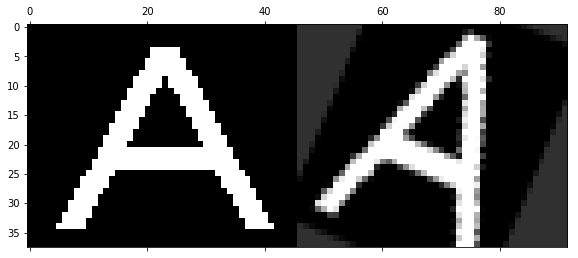

In [16]:
test_scale_x = 0.8
test_scale_y = 1.2
test_rotation = math.pi/8
arr_A_transformed = ipm.transform_using_values(arr_A, [
    test_scale_x, test_scale_y, 0, test_rotation, 0, 0])
plt.matshow(np.hstack((arr_A, arr_A_transformed)))

In [17]:
method='Powell'
affine_optimisation_result = ipm.optimise_scale_and_rotation(arr_A, arr_A_transformed, method=method)

In [18]:
affine_optimisation_result

array([0.7997833 , 1.20011082, 0.39287311])

In [19]:
params = [affine_optimisation_result[0], affine_optimisation_result[1], 0, affine_optimisation_result[2], 0, 0]

In [20]:
affine_optimisation_result_2 = ipm.optimise_scale_and_rotation(
    arr_A, arr_A_transformed, 
    scale_x=1.0, scale_y=1.0, 
    rotate_radians=0.2,
    method=method)

In [21]:
affine_optimisation_result_2

array([0.79978465, 1.20006751, 0.39266056])

In [22]:
params_2 = [affine_optimisation_result_2[0], affine_optimisation_result_2[1], 0, affine_optimisation_result_2[2], 0, 0]

In [23]:
affine_optimisation_result_3 = ipm.optimise_scale_and_rotation_best_of_two(
    arr_A, arr_A_transformed,
    method=method)

In [24]:
affine_optimisation_result_3

array([0.79978465, 1.20006751, 0.39266056])

In [25]:
params_3 = [affine_optimisation_result_3[0], affine_optimisation_result_3[1], 0, affine_optimisation_result_3[2], 0, 0]

In [26]:
arr_A_transformed_estimated = ipm.transform_using_values(arr_A, params)

In [27]:
arr_A_transformed_estimated_2 = ipm.transform_using_values(arr_A, params_2)

In [28]:
arr_A_transformed_estimated_3 = ipm.transform_using_values(arr_A, params_3)

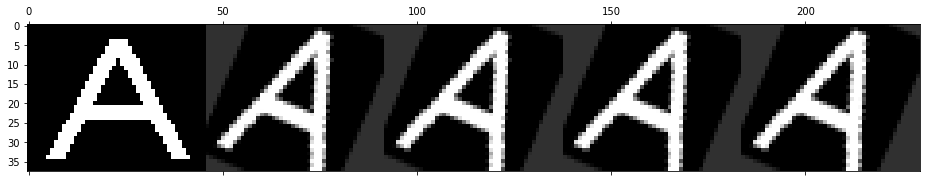

In [29]:
plt.matshow(np.hstack((arr_A, arr_A_transformed, arr_A_transformed_estimated, arr_A_transformed_estimated_2, arr_A_transformed_estimated_3)))

Left to right: `arr_A` unmodified; `arr_A_transformed`, which is `arr_A` scaled down and rotated clockwise by pi/6 radians (i.e. 30 degrees); `arr_A_transformed_estimated`, which is `arr_A` transformed by the parameters estimated by `ipm.optimise_scale_and_rotation`; `arr_A_transformed_estimated_2`, which is `arr_A` transformed by the same method with a different initial guess of the rotation parameter; `arr_A_transformed_estimated_3`, which is `arr_A` transformed by the parameters estimated by `ipm.optimise_scale_and_rotation_best_of_two`.

# Affine registration via local optimisation method (`signal_1.data[0]`, scaling and rotation only)

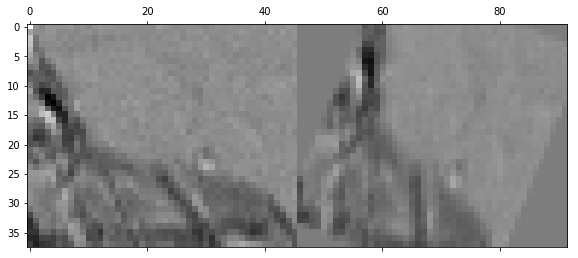

In [30]:
test_scale_x = 0.8
test_scale_y = 1.2
test_rotation = math.pi/8
data_1_transformed = ipm.transform_using_values(signal_1.data[0], [
    test_scale_x, test_scale_y, 0, test_rotation, 0, 0])
plt.matshow(np.hstack((signal_1.data[0], data_1_transformed)))

In [31]:
method='Powell'
affine_optimisation_result = ipm.optimise_scale_and_rotation(signal_1.data[0], data_1_transformed, method=method)

In [32]:
affine_optimisation_result

array([3.67178729, 1.63378181, 1.20796069])

In [33]:
params = [affine_optimisation_result[0], affine_optimisation_result[1], 0, affine_optimisation_result[2], 0, 0]

In [34]:
affine_optimisation_result_2 = ipm.optimise_scale_and_rotation(
    signal_1.data[0], data_1_transformed, 
    scale_x=1.0, scale_y=1.0, 
    rotate_radians=0.2,
    method=method)

In [35]:
affine_optimisation_result_2

array([0.70344445, 1.54646007, 0.20273638])

In [36]:
params_2 = [affine_optimisation_result_2[0], affine_optimisation_result_2[1], 0, affine_optimisation_result_2[2], 0, 0]

In [37]:
affine_optimisation_result_3 = ipm.optimise_scale_and_rotation_best_of_two(
    signal_1.data[0], data_1_transformed,
    method=method)

In [38]:
affine_optimisation_result_3

array([0.70344445, 1.54646007, 0.20273638])

In [39]:
params_3 = [affine_optimisation_result_3[0], affine_optimisation_result_3[1], 0, affine_optimisation_result_3[2], 0, 0]

In [40]:
data_1_transformed_estimated = ipm.transform_using_values(signal_1.data[0], params)

In [41]:
data_1_transformed_estimated_2 = ipm.transform_using_values(signal_1.data[0], params_2)

In [42]:
data_1_transformed_estimated_3 = ipm.transform_using_values(signal_1.data[0], params_3)

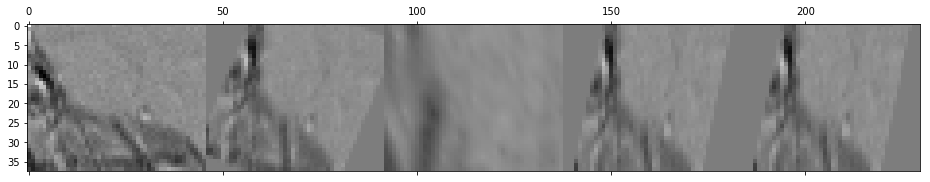

In [43]:
plt.matshow(np.hstack((signal_1.data[0], data_1_transformed, data_1_transformed_estimated, data_1_transformed_estimated_2, data_1_transformed_estimated_3)))

# Affine registration via local optimisation method (`arr_A`)

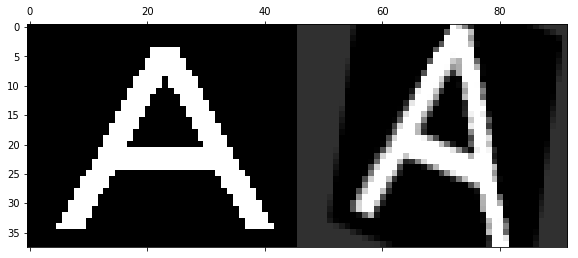

In [44]:
test_scale_x = 0.8
test_scale_y = 1.2
test_shear = -math.pi/12
test_rotation = math.pi/8
test_offset_x = 2
test_offset_y = -0.8
arr_A_transformed = ipm.transform_using_values(arr_A, [
    test_scale_x, test_scale_y, test_shear, test_rotation, test_offset_x, test_offset_y])
plt.matshow(np.hstack((arr_A, arr_A_transformed)))

In [45]:
method='Powell'
affine_optimisation_result = ipm.optimise_affine(arr_A, arr_A_transformed, method=method)

In [46]:
affine_optimisation_result

array([ 0.76323922,  1.23766869,  0.12146491,  0.046086  ,  1.39294344,
       -1.22466715])

In [49]:
arr_A_transformed_estimated = ipm.transform_using_values(arr_A, affine_optimisation_result)

In [47]:
affine_optimisation_result_2 = ipm.optimise_affine(
    arr_A, arr_A_transformed, 
    scale_x=1.0, scale_y=1.0, 
    shear_radians=0.1, rotate_radians=0.1, 
    offset_x=0.0, offset_y=0.0, 
    method=method)

In [48]:
affine_optimisation_result_2

array([ 0.77390754,  1.21143717,  0.05203993,  0.09873586,  1.53216892,
       -0.86228795])

In [50]:
arr_A_transformed_estimated_2 = ipm.transform_using_values(arr_A, affine_optimisation_result_2)

In [51]:
affine_optimisation_result_3 = ipm.pyramid_affine(arr_A, arr_A_transformed, registration_method=ipm.optimise_affine)

In [52]:
affine_optimisation_result_3

[0.8196899536849446,
 1.2638282222019548,
 0.1934473047361705,
 -0.0076758259724454105,
 1.001161218274818,
 0.005982918760707223]

In [53]:
[test_scale_x, test_scale_y, test_shear, test_rotation, test_offset_x, test_offset_y]

[0.8, 1.2, -0.2617993877991494, 0.39269908169872414, 2, -0.8]

In [54]:
arr_A_transformed_estimated_3 = ipm.transform_using_values(arr_A, affine_optimisation_result_3)

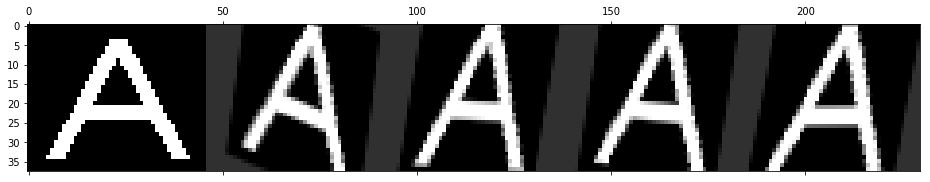

In [55]:
plt.matshow(np.hstack((arr_A, arr_A_transformed, arr_A_transformed_estimated, arr_A_transformed_estimated_2, arr_A_transformed_estimated_3)))

Left to right: `arr_A` unmodified; `arr_A_transformed`, which is `arr_A` scaled to be taller and narrower, slightly shifted, skewed by -pi/12 radians (i.e. -15 degrees) and rotated clockwise by pi/8 radians (i.e. 22.5 degrees); `arr_A_transformed_estimated`, which is `arr_A` transformed by the parameters estimated by `ipm.optimise_affine`; `arr_A_transformed_estimated_2`, which is `arr_A` transformed by the same method with a different initial guess of the shear and rotation parameters; `arr_A_transformed_estimated_3`, which is `arr_A` transformed by the parameters estimated by `ipm.pyramid_affine` with `registration_method=ipm.optimise_affine`.

# Affine registration via local optimisation method (`signal_1.data[0]`)

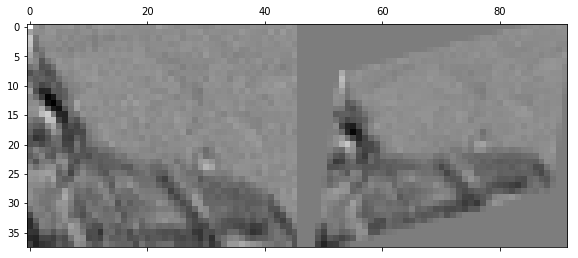

In [56]:
test_scale_x = 0.9
test_scale_y = 0.8
test_shear = math.pi/8
test_rotation = -math.pi/12
test_offset_x = 2
test_offset_y = -0.8
data_1_transformed = ipm.transform_using_values(signal_1.data[0], [
    test_scale_x, test_scale_y, test_shear, test_rotation, test_offset_x, test_offset_y])
plt.matshow(np.hstack((signal_1.data[0], data_1_transformed)))

In [57]:
method='Powell'
affine_optimisation_result = ipm.optimise_affine(signal_1.data[0], data_1_transformed, method=method)

In [58]:
affine_optimisation_result

array([ 0.97207611,  0.78342564,  0.31968409, -0.25838845,  1.90769275,
       -0.65236327])

In [59]:
affine_optimisation_result_2 = ipm.optimise_affine(
    signal_1.data[0], data_1_transformed, 
    scale_x=1.0, scale_y=1.0, 
    shear_radians=0.1, rotate_radians=0.1, 
    offset_x=0.0, offset_y=0.0, 
    method=method)

In [60]:
affine_optimisation_result_2

array([ 1.03158072,  0.75792037,  0.0951341 , -0.1892928 ,  0.14790896,
       -0.53786404])

In [61]:
affine_optimisation_result_3 = ipm.pyramid_affine(signal_1.data[0], data_1_transformed, registration_method=ipm.optimise_affine)

In [62]:
affine_optimisation_result_3

[4.305506635505006,
 0.9795689675836817,
 -0.5625604454086787,
 -0.09243798166269414,
 7.663201457270198,
 -0.9970558618595248]

In [63]:
[test_scale_x, test_scale_y, test_shear, test_rotation, test_offset_x, test_offset_y]

[0.9, 0.8, 0.39269908169872414, -0.2617993877991494, 2, -0.8]

In [64]:
data_1_transformed_estimated = ipm.transform_using_values(signal_1.data[0], affine_optimisation_result)

In [65]:
data_1_transformed_estimated_2 = ipm.transform_using_values(signal_1.data[0], affine_optimisation_result_2)

In [66]:
data_1_transformed_estimated_3 = ipm.transform_using_values(signal_1.data[0], affine_optimisation_result_3)

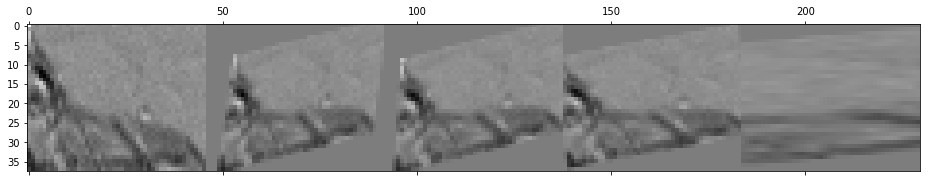

In [67]:
plt.matshow(np.hstack((signal_1.data[0], data_1_transformed, data_1_transformed_estimated, data_1_transformed_estimated_2, data_1_transformed_estimated_3)))

# Affine registration via global optimisation method (`arr_A`, differential evolution)

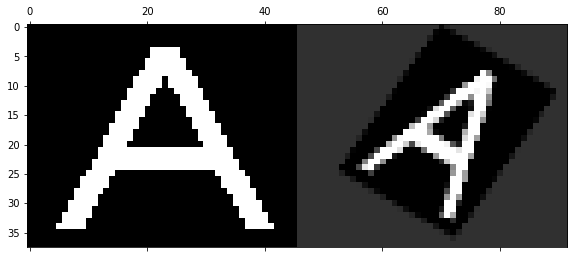

In [106]:
test_scale_x = 0.5
test_scale_y = 0.8
test_shear = math.pi/36
test_rotation = math.pi/6
test_offset_x = 2
test_offset_y = -0.8
arr_A_transformed = ipm.transform_using_values(arr_A, [
    test_scale_x, test_scale_y, test_shear, test_rotation, test_offset_x, test_offset_y])
plt.matshow(np.hstack((arr_A, arr_A_transformed)))

In [107]:
affine_optimisation_result = ipm.optimise_affine_by_differential_evolution(arr_A, arr_A_transformed)

In [108]:
affine_optimisation_result

array([ 0.50046623,  0.79975851,  0.09258455,  0.5189081 ,  1.99287988,
       -0.79297116])

In [109]:
arr_A_transformed_estimated = ipm.transform_using_values(arr_A, affine_optimisation_result)

In [110]:
affine_optimisation_result_2 = ipm.pyramid_affine(arr_A, arr_A_transformed, registration_method=ipm.optimise_affine_by_differential_evolution)

In [111]:
affine_optimisation_result_2

[0.49651546853025535,
 0.8015213861180941,
 0.06836968384965414,
 0.5375013493041395,
 2.0102229244017953,
 -0.8841867281046158]

In [112]:
arr_A_transformed_estimated_2 = ipm.transform_using_values(arr_A, affine_optimisation_result_2)

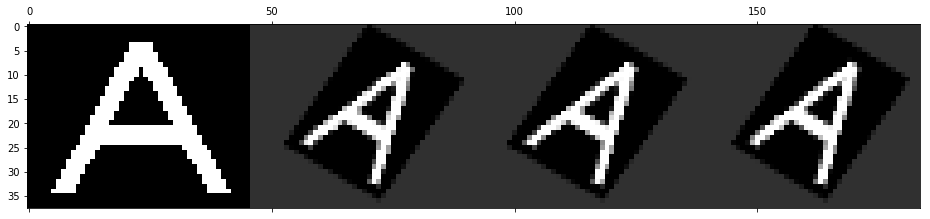

In [113]:
plt.matshow(np.hstack((arr_A, arr_A_transformed, arr_A_transformed_estimated, arr_A_transformed_estimated_2)))

# Pyramid strategy, step by step

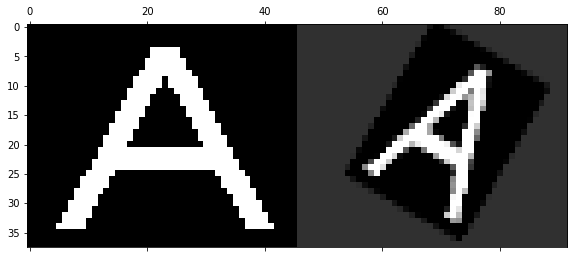

In [13]:
test_scale_x = 0.5
test_scale_y = 0.8
test_rotation = math.pi/6
test_offset_x = 2
test_offset_y = -0.8
arr_A_transformed = ipm.transform_using_values(arr_A, [
    test_scale_x, test_scale_y, 0, test_rotation, test_offset_x, test_offset_y])
plt.matshow(np.hstack((arr_A, arr_A_transformed)))

Left to right: original image, `arr_A`; transformed image, `arr_A_transformed`. The algorithm will attempt to align `arr_A` with `arr_A_transformed` by estimating the affine transform parameters.

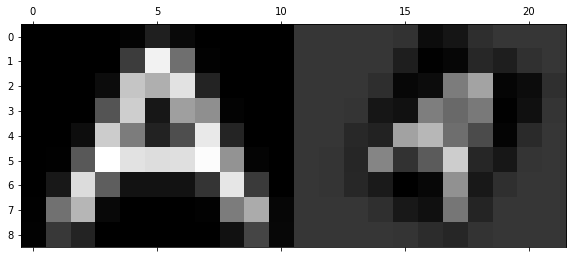

In [14]:
(height_A, width_A) = arr_A.shape
estimated_params_current = [1, 1, 0, 0, 0, 0]
downsampled_factor_2_moving = skimage.transform.resize(arr_A, (height_A//(2**2), width_A//(2**2)), mode='reflect', anti_aliasing=True)
downsampled_factor_2_ref = skimage.transform.resize(arr_A_transformed, (height_A//(2**2), width_A//(2**2)), mode='reflect', anti_aliasing=True)
plt.matshow(np.hstack((downsampled_factor_2_moving, downsampled_factor_2_ref)))

Left to right: downsampled version of `arr_A` (each pixel representing 16 pixels of the original); downsampled version of `arr_A_transformed`.

In [15]:
downsampled_2_estimate_params = ipm.optimise_affine_by_differential_evolution(downsampled_factor_2_moving, downsampled_factor_2_ref)
downsampled_2_estimate_params

array([ 0.52377381,  0.8175745 ,  0.20155736,  0.34677176,  0.11590348,
       -0.34759126])

In [16]:
downsampled_2_estimate = ipm.transform_using_values(downsampled_factor_2_moving, downsampled_2_estimate_params)

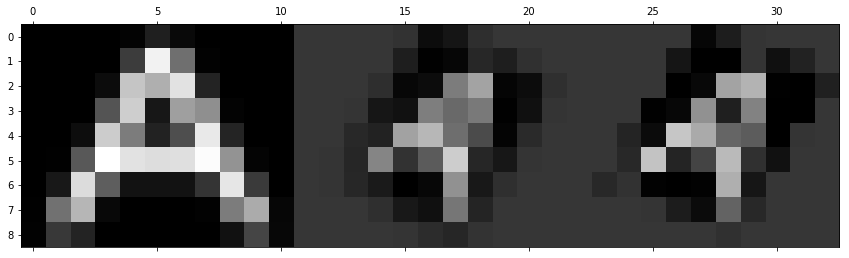

In [17]:
plt.matshow(np.hstack((downsampled_factor_2_moving, downsampled_factor_2_ref, downsampled_2_estimate)))

Left to right: downsampled version of `arr_A`; downsampled version of `arr_A_transformed`; downsampled `arr_A` after transforming with estimated parameters to align with the downsampled version of `arr_A_transformed`.

In [18]:
downsampled_2_estimate_params_scaled_up = np.array([
    downsampled_2_estimate_params[0], 
    downsampled_2_estimate_params[1], 
    downsampled_2_estimate_params[2], 
    downsampled_2_estimate_params[3], 
    downsampled_2_estimate_params[4] * height_A / (height_A//(2**2)), 
    downsampled_2_estimate_params[5] * width_A / (width_A//(2**2))])
downsampled_2_estimate_params_scaled_up

array([ 0.52377381,  0.8175745 ,  0.20155736,  0.34677176,  0.48937026,
       -1.45356347])

In [19]:
estimated_params_current = ipm.combine_affine_params(estimated_params_current, downsampled_2_estimate_params_scaled_up)
estimated_params_current

[0.5237738103932985,
 0.8175745042847145,
 0.20155735619097093,
 0.346771761569998,
 0.48937026142085244,
 -1.4535634707348584]

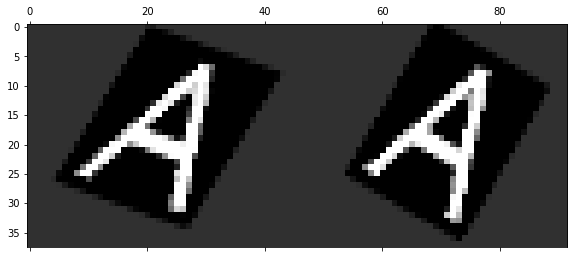

In [20]:
estimate_v1 = ipm.transform_using_values(arr_A, estimated_params_current)
plt.matshow(np.hstack((estimate_v1, arr_A_transformed)))

Left to right: `arr_A` transformed using the affine parameters estimated to map `downsampled_factor_2_moving` to `downsampled_factor_2_ref`; `arr_A_transformed`.

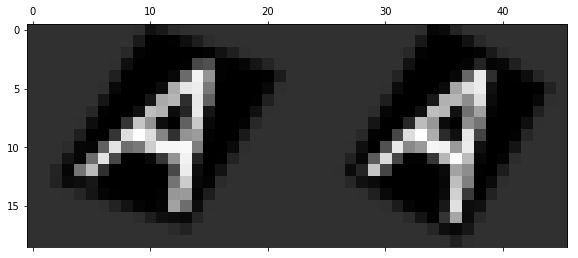

In [21]:
(height_A, width_A) = arr_A.shape
downsampled_factor_1_moving = skimage.transform.resize(estimate_v1, (height_A//(2**1), width_A//(2**1)), mode='reflect', anti_aliasing=True)
downsampled_factor_1_ref = skimage.transform.resize(arr_A_transformed, (height_A//(2**1), width_A//(2**1)), mode='reflect', anti_aliasing=True)
plt.matshow(np.hstack((downsampled_factor_1_moving, downsampled_factor_1_ref)))

Left to right: downsampled version of `estimate_v1` (each pixel representing 4 pixels of the original); downsampled version of `arr_A_transformed`.

In [22]:
downsampled_1_estimate_params = ipm.optimise_affine_by_differential_evolution(downsampled_factor_1_moving, downsampled_factor_1_ref)
downsampled_1_estimate_params

array([ 0.88906144,  1.06082289, -0.10129615,  0.12998013,  0.75608065,
        0.35301889])

In [23]:
downsampled_1_estimate = ipm.transform_using_values(downsampled_factor_1_moving, downsampled_1_estimate_params)

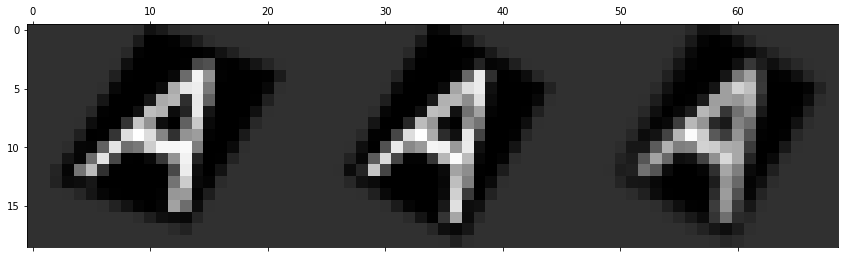

In [24]:
plt.matshow(np.hstack((downsampled_factor_1_moving, downsampled_factor_1_ref, downsampled_1_estimate)))

Left to right: downsampled version of `estimate_v1`; downsampled version of `arr_A_transformed`; downsampled `estimate_v1` after transforming with estimated parameters to align with the downsampled version of `arr_A_transformed`.

In [26]:
downsampled_1_estimate_params_scaled_up = np.array([
    downsampled_1_estimate_params[0], 
    downsampled_1_estimate_params[1], 
    downsampled_1_estimate_params[2], 
    downsampled_1_estimate_params[3], 
    downsampled_1_estimate_params[4] * height_A / (height_A//(2**1)), 
    downsampled_1_estimate_params[5] * width_A / (width_A//(2**1))])
downsampled_1_estimate_params_scaled_up

array([ 0.88906144,  1.06082289, -0.10129615,  0.12998013,  1.5121613 ,
        0.70603777])

In [27]:
estimated_params_current = ipm.combine_affine_params(estimated_params_current, downsampled_1_estimate_params_scaled_up)
estimated_params_current

[0.4941505267026175,
 0.796660034542675,
 0.001579795670736961,
 0.5199811731770041,
 1.987795264475706,
 -0.7789086421538814]

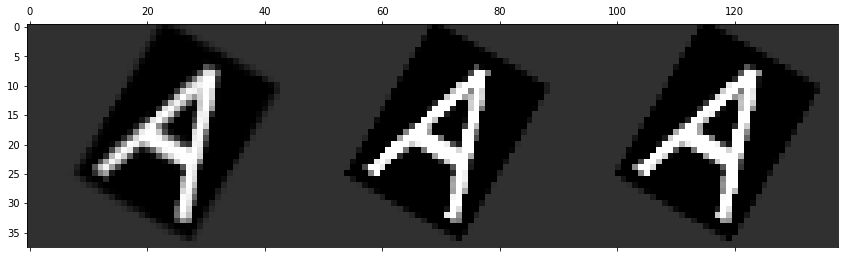

In [28]:
estimate_v2_a = ipm.transform_using_values(estimate_v1, downsampled_1_estimate_params_scaled_up)
estimate_v2 = ipm.transform_using_values(arr_A, estimated_params_current)
plt.matshow(np.hstack((estimate_v2_a, estimate_v2, arr_A_transformed)))

Left to right: `estimate_v1` transformed using the affine parameters estimated to map `downsampled_factor_1_moving` to `downsampled_factor_1_ref`; `arr_A` transformed using the accumulation of the affine parameters estimated so far to map `arr_A` to `arr_A_transformed`; `arr_A_transformed`.

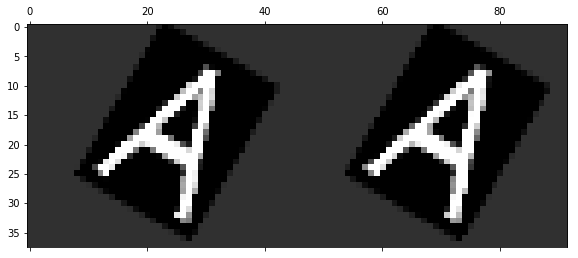

In [30]:
(height_A, width_A) = arr_A.shape
downsampled_factor_0_moving = skimage.transform.resize(estimate_v2, (height_A//(2**0), width_A//(2**0)), mode='reflect', anti_aliasing=True)
downsampled_factor_0_ref = skimage.transform.resize(arr_A_transformed, (height_A//(2**0), width_A//(2**0)), mode='reflect', anti_aliasing=True)
plt.matshow(np.hstack((downsampled_factor_0_moving, downsampled_factor_0_ref)))

Left to right: copy of `estimate_v2`; copy of `arr_A_transformed`. Technically both are downsampled by a factor of 0, such that each pixel represents 1 pixel of the original, but this is of course equivalent to no downsampling at all.

In [31]:
downsampled_0_estimate_params = ipm.optimise_affine_by_differential_evolution(downsampled_factor_0_moving, downsampled_factor_0_ref)
downsampled_0_estimate_params

array([ 1.00698995,  1.00852643, -0.00214334,  0.00324036,  0.0081155 ,
       -0.01455334])

In [32]:
downsampled_0_estimate = ipm.transform_using_values(downsampled_factor_0_moving, downsampled_0_estimate_params)

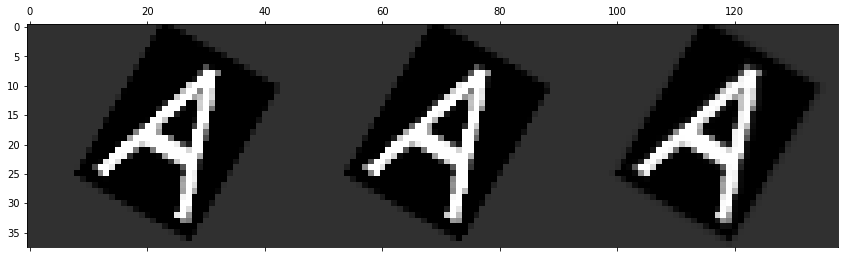

In [33]:
plt.matshow(np.hstack((downsampled_factor_0_moving, downsampled_factor_0_ref, downsampled_0_estimate)))

Left to right: copy of `estimate_v2`; copy of `arr_A_transformed`; copy of `estimate_v2` after transforming with estimated parameters to align with the copy of `arr_A_transformed`.

In [34]:
downsampled_0_estimate_params_scaled_up = np.array([
    downsampled_0_estimate_params[0], 
    downsampled_0_estimate_params[1], 
    downsampled_0_estimate_params[2], 
    downsampled_0_estimate_params[3], 
    downsampled_0_estimate_params[4] * height_A / (height_A//(2**0)), 
    downsampled_0_estimate_params[5] * width_A / (width_A//(2**0))])
downsampled_0_estimate_params_scaled_up

array([ 1.00698995,  1.00852643, -0.00214334,  0.00324036,  0.0081155 ,
       -0.01455334])

In [35]:
estimated_params_current = ipm.combine_affine_params(estimated_params_current, downsampled_0_estimate_params_scaled_up)
estimated_params_current

[0.49825235655684946,
 0.8024056083608015,
 -0.0008184093391686575,
 0.5233483596684608,
 2.0106566059652624,
 -0.793616620088282]

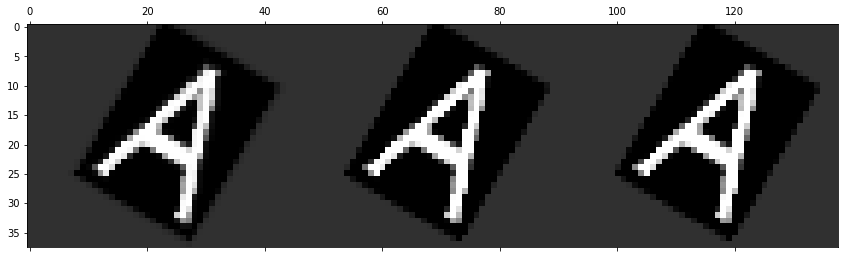

In [36]:
estimate_v3_a = ipm.transform_using_values(estimate_v2, downsampled_0_estimate_params_scaled_up)
estimate_v3 = ipm.transform_using_values(arr_A, estimated_params_current)
plt.matshow(np.hstack((estimate_v3_a, estimate_v3, arr_A_transformed)))

Left to right: `estimate_v2` transformed using the affine parameters estimated to map `downsampled_factor_0_moving` to `downsampled_factor_0_ref`; `arr_A` transformed using the accumulation of the affine parameters estimated so far to map `arr_A` to `arr_A_transformed`; `arr_A_transformed`.

The middle image represents the final registration result.

In [42]:
ipm.mutual_information(estimate_v3, arr_A_transformed)

0.9556228553841495

In [137]:
[test_scale_x, test_scale_y, test_shear, test_rotation, test_offset_x, test_offset_y]

[0.5, 0.8, 0.08726646259971647, 0.5235987755982988, 2, -0.8]

# Affine registration via global optimisation method (`signal_2`, differential evolution)

In [46]:
shifts_2 = ipm.estimate_shift_relative_to_most_representative_image(signal_2)

/dls_sw/apps/python/anaconda/1.7.0/64/envs/python3/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [47]:
signal_2_shifted = ipm.correct_shifts_vh(signal_2, shifts_2)

In [4]:
# Warning: this takes about 40 minutes to execute.
signal_2_affine_params = ipm.affine_signal_params(signal_2)

In [48]:
# To save the trouble of running the time-consuming code, here are the outputs of one run.
signal_2_affine_params = np.array([[ 9.17695957e-01,  9.25923412e-01,  1.19584425e-02,
         3.94932749e-02,  2.63585662e-01,  8.79180574e-02],
       [ 8.99166135e-01,  9.31932873e-01,  1.32137362e-02,
         1.91732261e-02, -6.17782238e-02,  3.45081874e-01],
       [ 9.63767007e-01,  9.44739743e-01, -4.54495304e-02,
         5.89027416e-02, -2.96959992e-02,  3.75396637e-01],
       [ 9.40915103e-01,  9.35269755e-01, -3.80280218e-04,
         3.78760877e-02,  8.28740565e-02,  5.39460108e-01],
       [ 9.03305272e-01,  9.33420183e-01, -1.81030138e-02,
         5.71378731e-02,  1.44027743e-01,  2.43290324e-01],
       [ 9.62238765e-01,  9.80850613e-01, -2.25956628e-03,
         5.10463466e-02,  1.77881919e-01,  4.32053218e-01],
       [ 9.25542346e-01,  9.66715078e-01, -3.92104338e-02,
         5.33101030e-02, -1.40800924e-01,  4.11218128e-01],
       [ 9.74717522e-01,  9.66927578e-01, -4.79435574e-02,
         6.08185886e-02, -1.14770367e-01,  5.17136538e-01],
       [ 9.32089694e-01,  9.43327737e-01, -3.05389209e-02,
         4.75793600e-02,  1.94055439e-01,  5.57443713e-01],
       [ 9.53118591e-01,  9.31450628e-01, -1.38123563e-02,
         6.59228885e-02, -1.12359742e-01,  7.53373906e-01],
       [ 9.33464479e-01,  9.63710155e-01, -6.27438246e-02,
         5.75949300e-02, -3.55028777e-02,  6.53229073e-01],
       [ 9.48674836e-01,  9.58893641e-01, -4.01843903e-02,
         4.62722678e-02, -1.88031798e-02,  5.15794388e-01],
       [ 9.50173203e-01,  9.54343827e-01, -2.29491886e-02,
         5.58784286e-02, -1.88269649e-01,  3.57962560e-01],
       [ 9.54487488e-01,  9.52209843e-01, -2.04396300e-02,
         4.70310032e-02, -1.60488080e-01,  5.52912823e-01],
       [ 9.68510107e-01,  9.43214531e-01, -1.67583194e-02,
         4.82750518e-02,  8.22975080e-02,  4.77379148e-01],
       [ 9.46510856e-01,  9.58566628e-01, -1.29434782e-02,
         3.63374383e-02, -8.17671555e-02,  3.33804021e-01],
       [ 9.63521211e-01,  9.54446601e-01, -1.62337897e-02,
         1.94382067e-02, -1.13163756e-01,  5.91462476e-01],
       [ 9.66132292e-01,  9.67784902e-01, -3.44953775e-02,
         5.38584295e-02, -4.20159818e-02,  3.72451200e-01],
       [ 9.52027323e-01,  9.66971744e-01, -3.26136720e-02,
         4.28025500e-02, -1.36040090e-01,  6.25086986e-01],
       [ 9.67754222e-01,  9.48928368e-01, -3.13447788e-02,
         3.20219000e-02, -1.27110374e-01,  4.51411055e-01],
       [ 9.46642780e-01,  9.73504952e-01, -2.44943198e-02,
         3.05735967e-02, -1.28710267e-02,  4.88334882e-01],
       [ 9.56433451e-01,  9.28692812e-01, -4.54540137e-02,
         4.83187543e-02,  1.57691310e-01,  4.62609346e-01],
       [ 9.65932668e-01,  9.80832133e-01, -4.37808554e-03,
         1.11533272e-02, -3.09647279e-02,  3.48166500e-01],
       [ 9.86388548e-01,  9.85004147e-01, -5.42195540e-03,
         3.68910285e-02, -6.94876761e-01,  5.22209391e-01],
       [ 9.72729062e-01,  9.90859791e-01,  2.55420471e-02,
         2.49363638e-02, -6.90163619e-02,  2.36640194e-01],
       [ 9.50090436e-01,  9.73577383e-01, -7.10964748e-03,
         3.60954286e-02, -1.22822447e-01,  5.95326532e-01],
       [ 9.84478724e-01,  9.69134834e-01, -2.53127272e-02,
         3.28324112e-02, -3.13971975e-01,  3.85609623e-01],
       [ 9.45511753e-01,  9.91576879e-01, -6.59641548e-03,
         4.23944338e-02,  1.22027347e-02,  5.79840849e-01],
       [ 9.64997365e-01,  9.83586304e-01, -2.74070413e-02,
         3.47147980e-02, -4.67563830e-01,  5.73394280e-01],
       [ 9.70486291e-01,  9.91122261e-01, -1.69947535e-02,
         3.80162699e-02, -2.36506257e-01,  3.72543960e-01],
       [ 9.45984158e-01,  9.60827672e-01, -4.75917973e-02,
         3.04265183e-02, -2.44003175e-02,  3.95549555e-01],
       [ 9.55925943e-01,  9.93184565e-01, -1.72000244e-02,
         2.84006188e-02, -2.91556532e-01,  3.95249472e-01],
       [ 9.76118463e-01,  9.76640823e-01, -1.46945312e-02,
         2.23125198e-02, -4.38726267e-01,  3.19972745e-01],
       [ 9.85376417e-01,  9.88556669e-01,  3.46043222e-03,
         1.69355197e-02, -7.27096244e-01,  5.15787114e-01],
       [ 9.61283911e-01,  9.72386242e-01, -1.81894212e-03,
         1.46352742e-02,  7.86979021e-02,  4.32323821e-01],
       [ 9.90347249e-01,  9.87975557e-01, -8.76439514e-03,
         2.01586157e-02, -3.72069905e-01,  3.38108963e-01],
       [ 9.69973342e-01,  9.79311276e-01, -1.80992436e-03,
         1.34017821e-02, -1.17022445e-04,  1.01707299e-01],
       [ 9.77948995e-01,  9.81496606e-01,  1.38779710e-02,
         1.71482106e-02, -2.36395880e-01,  4.73313047e-01],
       [ 9.74939358e-01,  9.75626747e-01, -1.57886080e-02,
         2.55532726e-02,  1.71029349e-01,  2.16859368e-01],
       [ 9.80804898e-01,  9.85085909e-01, -9.57718300e-03,
         1.71755386e-02, -7.36617062e-02,  1.94054890e-01],
       [ 9.93105272e-01,  9.96985782e-01, -1.98606088e-02,
         1.72465725e-02, -6.49659052e-02, -1.56184581e-02],
       [ 9.64944518e-01,  9.81309880e-01, -2.65156101e-02,
         2.43504067e-02, -2.01445554e-01,  3.29348572e-01],
       [ 9.83209694e-01,  9.83132995e-01,  1.39480405e-02,
         8.39270114e-03,  6.17454544e-02,  3.30968085e-01],
       [ 9.80470071e-01,  9.93115521e-01, -1.73410581e-02,
        -3.36751251e-03, -8.77206821e-02,  1.64440988e-01],
       [ 9.97707956e-01,  9.87353826e-01,  2.88134442e-02,
        -2.04910978e-03, -5.90954064e-01,  1.24511000e-01],
       [ 9.72993799e-01,  9.87724148e-01, -1.25338287e-02,
         1.73984164e-02, -1.74133891e-02,  3.25284289e-01],
       [ 9.87355691e-01,  9.73505796e-01, -2.49056747e-02,
         2.73907449e-04, -7.09676237e-01,  4.59577816e-01],
       [ 9.93595099e-01,  9.58963624e-01,  1.17600588e-02,
         9.66465555e-03, -7.41549408e-02,  2.61262032e-01],
       [ 9.74370847e-01,  9.92594966e-01,  1.29609135e-02,
         2.00367847e-02, -1.92346578e-01,  2.73475643e-01],
       [ 9.98547163e-01,  9.80011784e-01,  5.82691656e-03,
        -9.48556832e-03, -4.24063170e-01,  3.57747108e-01],
       [ 9.72700342e-01,  1.00865668e+00, -3.09937024e-02,
         3.30552920e-02, -1.21952245e-01, -3.55485636e-02],
       [ 9.95377728e-01,  1.00340935e+00,  2.24942609e-02,
        -7.49643056e-03, -2.09448997e-01,  3.20662109e-01],
       [ 9.90035121e-01,  1.01692386e+00, -2.45680700e-02,
         1.93957548e-02, -2.70587316e-01, -2.16087964e-02],
       [ 9.77265957e-01,  9.81229804e-01, -5.82535258e-03,
         1.79445622e-02,  9.78118985e-02,  1.65892793e-01],
       [ 9.87615977e-01,  1.00001985e+00,  4.05334631e-03,
         1.26048775e-03, -6.75599528e-02, -6.65083048e-02],
       [ 9.82871618e-01,  1.02167167e+00,  1.20225016e-02,
         9.62878423e-03, -1.25902652e-01,  1.20916642e-01],
       [ 9.95938954e-01,  9.73892685e-01,  1.39340259e-02,
         5.61477230e-03,  2.62854592e-02,  6.58798966e-02],
       [ 9.77818943e-01,  9.73144500e-01, -8.93573781e-04,
         1.65946577e-02,  3.54546892e-01, -4.14153513e-02],
       [ 9.97340904e-01,  9.82032099e-01, -1.87950908e-02,
         1.41516796e-02,  8.82716311e-04,  7.79356257e-02],
       [ 9.90631451e-01,  1.00114439e+00,  1.36945888e-02,
        -2.27396356e-03,  4.12057694e-01,  6.24304723e-02],
       [ 9.97058574e-01,  1.00390206e+00,  3.26019328e-02,
        -3.25245886e-04,  1.59990378e-01, -1.67747238e-01],
       [ 1.00634444e+00,  9.96731239e-01,  1.07717423e-02,
        -5.60449483e-03, -6.37581609e-01,  2.31604551e-01],
       [ 9.74097303e-01,  1.01993568e+00,  2.58797320e-02,
         6.07939951e-03,  3.52010908e-01,  2.04342537e-02],
       [ 1.00772700e+00,  1.00359189e+00,  2.37521866e-02,
         1.82298101e-03, -5.16227208e-02,  2.07711164e-01],
       [ 9.73733224e-01,  9.89097461e-01, -2.81010817e-02,
         4.56235367e-03, -3.49282569e-01,  1.77962409e-01],
       [ 9.93996207e-01,  9.88770766e-01, -2.07229647e-02,
         8.05490925e-03,  9.61374079e-02,  6.88001588e-02],
       [ 1.00000000e+00,  1.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00645990e+00,  9.60826730e-01,  1.68130791e-02,
         2.12210895e-03, -4.63276690e-01, -1.01699414e-02],
       [ 9.93644485e-01,  9.93880976e-01,  1.62816093e-02,
        -3.08308947e-03,  2.10302950e-01, -2.61535322e-02],
       [ 1.01293130e+00,  1.02730565e+00, -5.67805391e-03,
         1.52919276e-02, -5.93055106e-03,  1.76696718e-02],
       [ 1.00721603e+00,  9.95038040e-01,  2.53096984e-02,
        -8.30918248e-03, -1.49201285e-01,  3.78260501e-01],
       [ 1.00697028e+00,  9.81560568e-01,  3.16554194e-02,
        -2.58040743e-02, -3.51974255e-01,  2.64233564e-01],
       [ 1.01606376e+00,  1.00966268e+00,  1.00742185e-02,
        -7.45345492e-03, -2.84245482e-01, -3.93836421e-03],
       [ 1.00562059e+00,  1.01148734e+00, -9.29858934e-03,
        -1.12777149e-02, -5.07095459e-01,  2.24298086e-01],
       [ 1.03012545e+00,  9.91161057e-01,  2.12257181e-02,
        -1.55798373e-02, -6.99164976e-01,  2.88025487e-01],
       [ 1.00588220e+00,  1.00350135e+00,  1.24811578e-02,
        -2.13243481e-02, -1.65987350e-01,  2.68150344e-01],
       [ 1.00880279e+00,  9.92966490e-01,  2.10036698e-02,
        -2.08984542e-02,  2.29556938e-01, -1.07222166e-01],
       [ 1.00508934e+00,  9.77950107e-01,  1.09248439e-02,
        -9.79098082e-03, -4.50425467e-01,  1.34371729e-01],
       [ 1.00873007e+00,  9.95518317e-01,  6.04329094e-02,
        -3.24842213e-02, -2.50603410e-01,  4.01366864e-02],
       [ 9.91603582e-01,  9.93255993e-01, -2.88502010e-02,
        -1.64155770e-03, -4.63228247e-01,  1.94466088e-02],
       [ 1.01166793e+00,  1.01081479e+00, -2.11930055e-02,
         1.59163146e-03, -2.22901462e-01,  1.02134289e-01],
       [ 1.01340309e+00,  1.00599770e+00,  4.46556047e-02,
        -1.67223722e-02, -2.39300798e-01,  6.56540770e-02],
       [ 1.01666324e+00,  1.00251550e+00,  2.05669253e-02,
        -1.04038399e-02,  2.40288420e-01, -4.48311438e-02],
       [ 1.01089482e+00,  9.85639782e-01,  6.77959604e-03,
        -1.57394732e-02, -7.65581393e-01,  3.40160865e-02],
       [ 1.01761481e+00,  1.04314416e+00,  2.45930377e-02,
        -1.39026564e-03, -1.16281193e-01, -2.33616137e-01],
       [ 1.01320948e+00,  1.00034732e+00,  5.14455382e-02,
        -2.68825887e-02, -3.38678520e-01, -2.86634867e-02],
       [ 1.00945459e+00,  1.01962389e+00,  4.14545596e-02,
         4.32759203e-03,  6.17432376e-01, -3.55670982e-01],
       [ 1.00364676e+00,  9.70832565e-01,  5.81844334e-03,
        -3.33880569e-03,  2.30476734e-01, -3.08058240e-01],
       [ 1.03622806e+00,  1.01169543e+00,  2.78202433e-02,
        -3.59948751e-02, -4.95652846e-01, -2.61068094e-01],
       [ 9.90921143e-01,  1.00315504e+00,  1.45471049e-02,
        -1.18819284e-02,  2.83329484e-01,  3.21699982e-02],
       [ 1.02308821e+00,  9.82341644e-01,  6.62872846e-02,
        -4.27527194e-02, -1.09435412e-01, -5.10383307e-02],
       [ 1.02199189e+00,  9.85843516e-01,  3.35338350e-02,
        -4.52564052e-03,  2.81528589e-01, -1.47098768e-01],
       [ 1.03720382e+00,  1.01290391e+00,  2.32535164e-02,
        -1.75543995e-02, -1.26636249e-01, -1.07542234e-01],
       [ 1.02297884e+00,  1.03254820e+00,  2.25379539e-02,
        -1.39940894e-02,  2.30461458e-01, -1.62827387e-01],
       [ 1.00729440e+00,  1.00105730e+00,  6.22988607e-02,
        -3.56887467e-02,  1.19012409e-01, -1.68895527e-01],
       [ 1.03239964e+00,  1.01008612e+00,  4.92236746e-02,
        -1.96908303e-02,  1.26146731e-01, -2.06290898e-01],
       [ 1.00876736e+00,  1.01139669e+00,  2.66001457e-02,
        -1.94468045e-02,  1.49215220e-01,  1.16843340e-01],
       [ 1.03183341e+00,  1.02685032e+00,  2.39286261e-02,
        -2.27809535e-02, -9.75512448e-02, -3.13556504e-01],
       [ 1.03832798e+00,  1.01499790e+00, -8.95376992e-04,
        -2.05983027e-02, -6.95294249e-01,  2.84348939e-01],
       [ 1.01359451e+00,  1.01971132e+00,  2.58877540e-02,
        -2.40481809e-02, -2.20374954e-01,  3.19850482e-02],
       [ 1.03879112e+00,  1.01478776e+00,  5.93925568e-02,
        -2.78965948e-02,  4.00619758e-01,  1.42562181e-01],
       [ 1.02144965e+00,  1.03096548e+00,  2.12770758e-02,
        -1.95243143e-02,  1.73326558e-01, -7.20315381e-02],
       [ 1.03430164e+00,  1.05405277e+00,  2.66452980e-02,
        -1.67011049e-02, -1.83999467e-03, -1.48506731e-01],
       [ 1.01563663e+00,  1.01922718e+00,  6.74957884e-03,
        -2.36098181e-02,  1.67586483e-01,  2.52273034e-01],
       [ 1.04999177e+00,  9.96497725e-01,  6.25093942e-02,
        -2.66057629e-02,  5.46553368e-02, -4.08942597e-02],
       [ 1.03871547e+00,  1.01040948e+00,  3.09858109e-02,
        -2.78222754e-02, -1.45062862e-01, -1.05632629e-01],
       [ 1.03041592e+00,  1.00656572e+00,  3.61943644e-02,
        -2.47844705e-02, -2.04194784e-01, -1.68644235e-01],
       [ 1.02661561e+00,  1.01177080e+00,  4.61520922e-02,
        -2.16985723e-02,  4.00265919e-01,  9.12403540e-02],
       [ 1.02020478e+00,  1.00648476e+00,  7.06380564e-02,
        -4.30165830e-02,  2.99841234e-01, -3.03123480e-01],
       [ 1.03772604e+00,  9.90679155e-01,  3.00493820e-02,
        -3.88805053e-02, -1.24761450e-02,  1.56312508e-02],
       [ 1.01573209e+00,  9.79300956e-01,  5.10002084e-02,
        -4.17069330e-02,  3.64663691e-01, -1.11452310e-02],
       [ 1.01292391e+00,  9.87530804e-01,  7.57273203e-02,
        -4.66731147e-02,  4.21049791e-01, -2.80744614e-01],
       [ 1.04101076e+00,  1.05495457e+00,  5.14225956e-02,
        -2.28989706e-02,  4.72004859e-01, -2.92869295e-01],
       [ 9.97261414e-01,  9.94187324e-01,  4.20864467e-02,
        -4.45113662e-02,  1.39952244e-01,  2.58830648e-01],
       [ 1.04015649e+00,  9.83888424e-01,  4.61186032e-02,
        -3.32804499e-02, -1.32097879e-01, -6.75991212e-02],
       [ 1.01742798e+00,  9.97818671e-01,  5.32184304e-02,
        -7.14565017e-03,  4.07411991e-01, -3.35781822e-01],
       [ 1.04378031e+00,  1.05642589e+00,  4.28862095e-02,
        -2.34389338e-02,  6.35196939e-02, -3.50326243e-01],
       [ 1.04065363e+00,  1.03396882e+00,  2.35576959e-02,
        -2.15538868e-02,  2.12075357e-01, -3.80304535e-01],
       [ 1.03814280e+00,  1.02321703e+00,  5.95644695e-02,
        -3.56541100e-02,  3.09660470e-01, -3.91602811e-01],
       [ 1.03172685e+00,  9.88894617e-01,  4.78653210e-02,
        -4.26397327e-02,  3.62566415e-01,  1.85210865e-02],
       [ 1.02391263e+00,  1.00373244e+00,  3.17168549e-02,
        -3.46237685e-02,  3.83403322e-01, -1.08891615e-01],
       [ 1.03089489e+00,  1.02173539e+00,  3.51736467e-02,
        -4.63289590e-02,  5.25282895e-01, -3.94428815e-01],
       [ 1.03141690e+00,  1.00642846e+00,  7.04262563e-02,
        -3.52155286e-02,  3.20601355e-01, -1.44698893e-01],
       [ 1.05678543e+00,  1.01640006e+00,  8.47622077e-02,
        -4.38899540e-02,  9.47686809e-02, -5.78856742e-02],
       [ 1.03300064e+00,  1.00632294e+00,  8.42802381e-02,
        -4.54352782e-02,  4.92335740e-02,  2.59140658e-02],
       [ 1.03935474e+00,  1.01500895e+00,  9.46348357e-02,
        -4.34299223e-02,  4.93674337e-01,  3.19194753e-01],
       [ 1.02519830e+00,  1.01675723e+00,  7.13615982e-02,
        -4.55133029e-02,  3.45979349e-01,  1.18513731e-01],
       [ 1.03728291e+00,  9.97559377e-01,  5.20886896e-02,
        -4.65844654e-02,  7.75248445e-01, -1.93289573e-01],
       [ 1.05046543e+00,  9.86595115e-01,  8.54379791e-02,
        -5.98671411e-02,  5.27477024e-02,  3.76895392e-02],
       [ 1.05152754e+00,  1.04323082e+00,  6.52588492e-02,
        -2.49317280e-02,  3.83331705e-01,  9.59139373e-02],
       [ 1.04367532e+00,  1.04202261e+00,  4.62172232e-02,
        -3.15074662e-02,  3.93569867e-01, -1.66797999e-01],
       [ 1.02725216e+00,  9.99926604e-01,  3.33041898e-02,
        -4.43329985e-02,  1.40198419e-01,  1.49963969e-01],
       [ 1.04250330e+00,  1.03690318e+00,  8.23565538e-02,
        -5.96772095e-02,  2.24364658e-01,  5.61874572e-02],
       [ 1.04249888e+00,  9.77547278e-01,  4.30361252e-02,
        -3.01749543e-02,  6.43740607e-01, -2.19481187e-02],
       [ 1.03441466e+00,  1.00437858e+00, -7.21406238e-03,
        -2.16076350e-02,  7.56243407e-01,  5.16650944e-03],
       [ 1.04200284e+00,  1.04884154e+00,  7.00217548e-02,
        -4.08849388e-02,  5.80986044e-01, -3.07919066e-01],
       [ 1.03650218e+00,  1.01905973e+00,  7.82022249e-02,
        -5.69392191e-02,  4.42519797e-01,  7.18402494e-03],
       [ 1.05921241e+00,  1.00318599e+00,  6.06049144e-02,
        -7.03796225e-02,  7.51362710e-01,  2.78745231e-01],
       [ 1.03785234e+00,  1.02163463e+00,  8.61738590e-02,
        -4.62042481e-02,  4.99597856e-01, -3.92492084e-02],
       [ 1.06271700e+00,  1.05037654e+00,  5.94278179e-02,
        -2.78947887e-02,  1.03266717e+00, -3.98408145e-01],
       [ 1.04218690e+00,  1.03935388e+00,  4.51516373e-02,
        -3.80462258e-02,  8.85733888e-01, -3.18163467e-01],
       [ 1.05722966e+00,  1.04149766e+00,  4.72154327e-02,
        -2.87472094e-02,  1.94762592e-01, -3.46448850e-01],
       [ 1.04402994e+00,  1.06998409e+00,  6.95224094e-02,
        -4.67664847e-02,  7.97299338e-01, -1.13349881e-01],
       [ 1.05571819e+00,  9.81253736e-01, -2.33152562e-02,
        -4.02678852e-03, -5.84967363e-01,  2.92833718e-01],
       [ 1.07606291e+00,  1.03960293e+00,  4.62900790e-02,
        -4.72114261e-02, -3.02772057e-01,  2.82093915e-01],
       [ 1.02613548e+00,  1.09492620e+00,  1.54101259e-02,
        -5.09475059e-02, -2.01696459e-02, -7.56781448e-02],
       [ 6.08856378e-01,  2.24674962e-01, -1.90846331e-01,
        -2.97319748e-01,  2.09738335e-01, -4.23593615e+00],
       [ 1.24539490e+00,  7.52593662e-01, -8.39333543e-01,
        -1.97187726e-01,  2.97804083e+00, -1.98222537e+00],
       [ 3.88545171e-01,  8.91507020e-01, -1.11306897e+00,
        -6.22261932e-01, -2.06501430e+00, -3.77970327e+00],
       [ 1.04988522e+00,  9.20144435e-01,  1.86369522e-01,
        -6.62932475e-02,  2.79740185e-02,  3.68387149e-01],
       [ 6.51330684e-01,  1.77550519e-01, -5.68363249e-01,
        -2.81802288e-01,  4.22855408e-02, -3.88598840e+00]])

In [49]:
x_scales = signal_2_affine_params.T[0]
y_scales = signal_2_affine_params.T[1]
shears = signal_2_affine_params.T[2]
rotations_degrees = signal_2_affine_params.T[3] * 180 / math.pi
x_offsets = signal_2_affine_params.T[4]
y_offsets = signal_2_affine_params.T[5]

### Plots of estimated parameter values

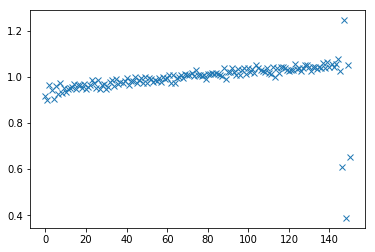

In [6]:
plt.plot(x_scales, 'x')

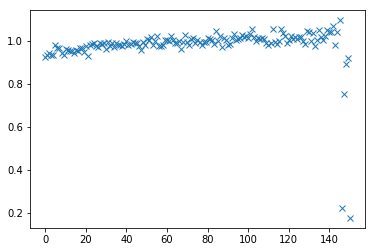

In [7]:
plt.plot(y_scales, 'x')

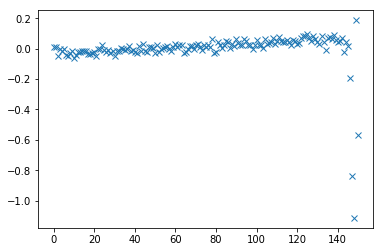

In [8]:
plt.plot(shears, 'x')

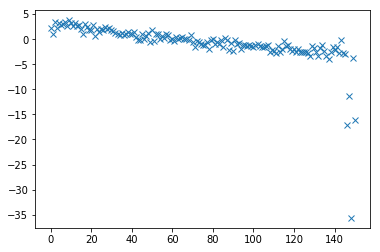

In [44]:
plt.plot(rotations_degrees, 'x')

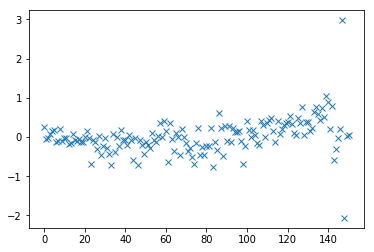

In [10]:
plt.plot(x_offsets, 'x')

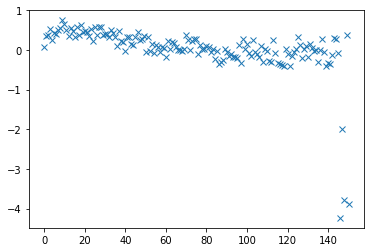

In [11]:
plt.plot(y_offsets, 'x')

In [50]:
signal_2_transformed = ipm.apply_affine_params_to_signal(signal_2, signal_2_affine_params)

In [61]:
reference_image_index = ipm.highest_mutual_information_index(signal_2)
reference_image_normalised = ipm.normalised_image(signal_2.data[reference_image_index])
signal_ref_diff = hs.signals.Signal2D(np.empty_like(signal_2))
num_images = signal_2.data.shape[0]
for t in range(num_images):
    signal_ref_diff.data[t] = abs(ipm.normalised_image(signal_2_transformed.data[t]) - reference_image_normalised)

In [62]:
%matplotlib qt
#hs.plot.plot_signals([signal_2, signal_2_shifted, signal_2_transformed])
hs.plot.plot_signals([signal_2, signal_2_transformed, signal_ref_diff])

# Affine registration via global optimisation method (`signal_1_small`, differential evolution)

`signal_1_small` is a selection of 7 frames from `signal_1`. These particular frames were chosen because there is a noticeable drift between them.

In [3]:
signal_1_small = hs.signals.Signal2D(np.array([
    signal_1.data[0], signal_1.data[4], signal_1.data[10], signal_1.data[11], signal_1.data[22], signal_1.data[35], signal_1.data[45]]))

In [4]:
signal_1_small_affine_params = ipm.scale_and_translation_signal_params(signal_1_small)

Estimating affine parameters for frame 1 of 7
Estimating affine parameters for frame 2 of 7
Estimating affine parameters for frame 3 of 7
Estimating affine parameters for frame 4 of 7
Estimating affine parameters for frame 5 of 7


/home/fqj69741/notebooks/ImageProcessingMethods.py:711: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/mutual_information(transform_using_values(arr_moving, parameters), arr_ref)
/dls_sw/apps/python/anaconda/1.7.0/64/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Estimating affine parameters for frame 6 of 7
Estimating affine parameters for frame 7 of 7


In [5]:
signal_1_small_affine_params

array([[ 1.05914821,  1.15240625, -0.        ,  0.        ,  0.10019983,
         0.32357674],
       [ 1.01492337,  1.03169509, -0.        ,  0.        ,  0.04214264,
         0.62825774],
       [ 1.01767859,  1.02791424, -0.        ,  0.        ,  0.12248135,
         0.1833936 ],
       [ 1.        ,  1.        , -0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.02274032,  1.02331801, -0.        ,  0.        ,  0.31098812,
        -0.29568326],
       [ 1.01777298,  1.07039028, -0.        ,  0.        ,  0.21315929,
        -0.73759748],
       [ 1.03104319,  1.03718433, -0.        ,  0.        ,  0.42973633,
        -0.82617744]])

In [6]:
signal_1_small_transformed = ipm.apply_affine_params_to_signal(signal_1_small, signal_1_small_affine_params)

In [7]:
%matplotlib qt
hs.plot.plot_signals([signal_1_small, signal_1_small_transformed])

# Affine registration via global optimisation method (`signal_A_2`, differential evolution)

In [38]:
signal_A_2_params = ipm.affine_signal_params(signal_A_2)

Estimating affine parameters for frame 1 of 21
Estimating affine parameters for frame 2 of 21
Estimating affine parameters for frame 3 of 21
Estimating affine parameters for frame 4 of 21
Estimating affine parameters for frame 5 of 21
Estimating affine parameters for frame 6 of 21
Estimating affine parameters for frame 7 of 21
Estimating affine parameters for frame 8 of 21
Estimating affine parameters for frame 9 of 21
Estimating affine parameters for frame 10 of 21
Estimating affine parameters for frame 11 of 21
Estimating affine parameters for frame 12 of 21
Estimating affine parameters for frame 13 of 21
Estimating affine parameters for frame 14 of 21
Estimating affine parameters for frame 15 of 21
Estimating affine parameters for frame 16 of 21
Estimating affine parameters for frame 17 of 21
Estimating affine parameters for frame 18 of 21
Estimating affine parameters for frame 19 of 21
Estimating affine parameters for frame 20 of 21
Estimating affine parameters for frame 21 of 21


In [39]:
np.array([all_scale_x, all_scale_y, all_shear, all_rotation, all_offset_x, all_offset_y]).T

array([[ 9.38548162e-01,  9.08156664e-01, -2.60923394e-01,
         4.36568497e-01,  3.19131839e+00,  7.34515194e+00],
       [ 9.70945594e-01,  9.35614737e-01, -2.55247089e-01,
         3.65826578e-01, -1.62156517e-01,  6.99515631e+00],
       [ 9.92056782e-01,  9.54922935e-01, -2.46135415e-01,
         2.99327164e-01, -2.72738650e+00,  6.25278320e+00],
       [ 1.00315223e+00,  9.66934530e-01, -2.34220426e-01,
         2.37517365e-01, -4.57588169e+00,  5.18551319e+00],
       [ 1.00550243e+00,  9.72502798e-01, -2.20134174e-01,
         1.80844287e-01, -5.77915219e+00,  3.86082686e+00],
       [ 1.00037788e+00,  9.72481011e-01, -2.04508710e-01,
         1.29755040e-01, -6.40870813e+00,  2.34620480e+00],
       [ 9.89049099e-01,  9.67722445e-01, -1.87976088e-01,
         8.46967317e-02, -6.53605964e+00,  7.09127602e-01],
       [ 9.72786569e-01,  9.59080373e-01, -1.71168360e-01,
         4.61164708e-02, -6.23271683e+00, -9.82924150e-01],
       [ 9.52860797e-01,  9.47408069e-01, -1.547

In [42]:
signal_A_2_params

array([[ 9.11334112e-01,  1.00047575e+00, -6.70302380e-02,
        -2.21125750e-01, -7.81907086e+00, -4.42650207e+00],
       [ 8.90503474e-01,  1.06919925e+00, -8.54918744e-02,
        -1.16982606e-01, -7.64521859e+00, -5.68046921e+00],
       [ 9.17422726e-01,  1.12883949e+00, -1.59151488e-01,
         2.61197693e-02, -7.23229942e+00, -6.02175578e+00],
       [ 9.39007676e-01,  1.16123135e+00, -2.61493603e-01,
         1.74246785e-01, -6.31282582e+00, -6.26390402e+00],
       [ 9.70474237e-01,  1.20172987e+00, -3.18489491e-01,
         2.71517669e-01, -5.39967906e+00, -6.12867926e+00],
       [ 9.92455408e-01,  1.20655539e+00, -3.35845726e-01,
         3.12174452e-01, -4.62409395e+00, -5.41998742e+00],
       [ 1.00959326e+00,  1.18751158e+00, -3.22179926e-01,
         3.33292596e-01, -3.69044545e+00, -4.32077685e+00],
       [ 1.00948337e+00,  1.17374710e+00, -2.91860288e-01,
         3.29094668e-01, -2.92335116e+00, -3.44060978e+00],
       [ 1.00755906e+00,  1.14765357e+00, -2.465

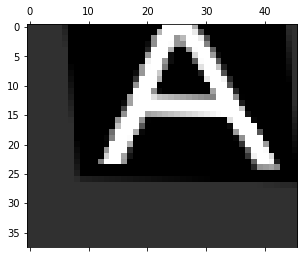

In [40]:
plt.matshow(signal_A_2.data[ipm.highest_mutual_information_index(signal_A_2)])

In [41]:
signal_A_2_registered = ipm.apply_affine_params_to_signal(signal_A_2, signal_A_2_params)

In [45]:
%matplotlib qt
hs.plot.plot_signals([signal_A_2, signal_A_2_registered])